<a href="https://colab.research.google.com/github/Elizabeth-George-M/MLab/blob/main/ML_LAB_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycountry-convert
!pip install sktime[all_extras]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import pycountry_convert as pc
import geopandas

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/global-data-on-sustainable-energy (1).csv')

In [ ]:
df.head(10)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60,652230.0,33.93911,67.709953
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,...,607.83350,1.94,3559.999943,NaN,3.924984,364.663542,60,652230.0,33.93911,67.709953
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,...,975.04816,2.25,4880.000114,NaN,21.390528,437.268740,60,652230.0,33.93911,67.709953


In [ ]:
print(df.columns)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')


**Data Preprocessing & Exploration**

In [ ]:
df.shape

(3649, 21)

In [ ]:
# Number of zero values in the dataset (in percent)
missing_values_df = df.isnull().sum() / df.shape[0] * 100.00
print(round(missing_values_df),2)

Entity                                                               0.0
Year                                                                 0.0
Access to electricity (% of population)                              0.0
Access to clean fuels for cooking                                    5.0
Renewable-electricity-generating-capacity-per-capita                26.0
Financial flows to developing countries (US $)                      57.0
Renewable energy share in the total final energy consumption (%)     5.0
Electricity from fossil fuels (TWh)                                  1.0
Electricity from nuclear (TWh)                                       3.0
Electricity from renewables (TWh)                                    1.0
Low-carbon electricity (% electricity)                               1.0
Primary energy consumption per capita (kWh/person)                   0.0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          6.0
Value_co2_emissions_kt_by_country                  



There are indicators with a rather large number of zero values:

    Renewables (% equivalent to primary energy) - 59.0%.
    Financial flows to developing countries (US $) - 57.0%.

Now, their cleaning can cause significant errors in the study, as more than 57% of the data will be removed.


In [ ]:
df.isna().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [ ]:
df.fillna(0.0, inplace=True)

In [ ]:
df.isna().sum()

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Financial flows to developing countries (US $)                      0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
Renewables (% equiva

In [ ]:
df.shape

(3649, 21)

**DATA VISUALIZATION**

In [ ]:
# Function to plot features on world map
def plot_world_map(column_name):
    fig = go.Figure()
    for year in range(2000, 2021):
        # Filter the data for the current year
        filtered_df = df[df['Year'] == year]

        # Create a choropleth trace for the current year
        trace = go.Choropleth(
            locations=filtered_df['Entity'],
            z=filtered_df[column_name],
            locationmode='country names',
            colorscale='Electric',  # Use a different color scale for better contrast
            colorbar=dict(title=column_name),
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False  # Set the trace to invisible initially
        )

        # Add the trace to the figure
        fig.add_trace(trace)

    # Set the first trace to visible
    fig.data[0].visible = True

    # Create animation steps
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},  # Set all traces to invisible
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)  # Set the label for each step
        )
        step['args'][0]['visible'][i] = True  # Set the current trace to visible
        steps.append(step)

    # Create the slider
    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},  # Increase font size for slider label
    )]

    # Update the layout of the figure with increased size and change the template
    fig.update_layout(
        title_text=f'{column_name} Map with slider',  # Set the initial title
        title_font_size=24,  # Increase title font size
        title_x=0.5,  # Center the title
        geo=dict(
            showframe=True,
            showcoastlines=True,
            projection_type='natural earth'
        ),
        sliders=sliders,
        height=500,  # Set the height of the figure in pixels
        width=1000,  # Set the width of the figure in pixels
        font=dict(family='Arial', size=12),  # Customize font family and size for the whole figure
        margin=dict(t=80, l=50, r=50, b=50),  # Add margin for better layout spacing
        template='plotly_dark',  # Change the template to 'plotly_dark'
    )
    fig.show()

In [ ]:
column_name = 'Access to electricity (% of population)'
plot_world_map(column_name)

In [ ]:
column_name = 'Access to clean fuels for cooking'
plot_world_map(column_name)

In [ ]:
column_name = 'Renewable energy share in the total final energy consumption (%)'
plot_world_map(column_name)

In [ ]:
column_name = 'Electricity from fossil fuels (TWh)'
plot_world_map(column_name)

In [ ]:
column_name = 'Electricity from nuclear (TWh)'
plot_world_map(column_name)

In [ ]:
column_name='Electricity from renewables (TWh)'
plot_world_map(column_name)

In [ ]:
column_name = 'Low-carbon electricity (% electricity)'
plot_world_map(column_name)

In [ ]:
column_name = 'Primary energy consumption per capita (kWh/person)'
plot_world_map(column_name)

In [ ]:
column_name = 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'
plot_world_map(column_name)

In [ ]:
column_name = 'Value_co2_emissions_kt_by_country'
plot_world_map(column_name)

In [ ]:
column_name = 'Renewables (% equivalent primary energy)'
plot_world_map(column_name)

In [ ]:
column_name = 'gdp_growth'
plot_world_map(column_name)

In [ ]:
column_name = 'gdp_per_capita'
plot_world_map(column_name)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2010.000000,2.015000e+03,2.020000e+03
Access to electricity (% of population),3649.0,7.871739e+01,3.051439e+01,0.000000,58.721474,98.264870,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3649.0,6.032568e+01,4.038026e+01,0.000000,14.600000,78.850000,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,3649.0,8.427178e+01,2.164162e+02,0.000000,0.000000,7.890000,6.760000e+01,3.060190e+03
Financial flows to developing countries (US $),3649.0,4.028212e+07,2.004093e+08,0.000000,0.000000,0.000000,2.070000e+06,5.202310e+09
Renewable energy share in the total final energy consumption (%),3649.0,3.090295e+01,2.999693e+01,0.000000,4.480000,20.710000,5.261000e+01,9.604000e+01
Electricity from fossil fuels (TWh),3649.0,6.996005e+01,3.470895e+02,0.000000,0.280000,2.940000,2.652000e+01,5.184130e+03
Electricity from nuclear (TWh),3649.0,1.298576e+01,7.177678e+01,0.000000,0.000000,0.000000,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3649.0,2.383007e+01,1.041459e+02,0.000000,0.040000,1.420000,9.560000e+00,2.184940e+03
Low-carbon electricity (% electricity),3649.0,3.637760e+01,3.434192e+01,0.000000,2.198241,26.824644,6.402267e+01,1.000000e+02


In [ ]:
df.nunique()

Entity                                                               176
Year                                                                  21
Access to electricity (% of population)                             2041
Access to clean fuels for cooking                                    896
Renewable-electricity-generating-capacity-per-capita                2110
Financial flows to developing countries (US $)                      1017
Renewable energy share in the total final energy consumption (%)    2587
Electricity from fossil fuels (TWh)                                 1859
Electricity from nuclear (TWh)                                       547
Electricity from renewables (TWh)                                   1533
Low-carbon electricity (% electricity)                              2647
Primary energy consumption per capita (kWh/person)                  3628
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         1045
Value_co2_emissions_kt_by_country                  

In [ ]:
df.corr()

<ipython-input-65-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
Year,1.000000,0.132617,0.068734,0.086321,0.109810,-0.111277,0.032524,-0.004693,0.073719,0.029834,0.004196,-0.259373,0.005162,0.054758,-0.176752,0.129598,-0.001447,0.003848,0.001046
Access to electricity (% of population),0.132617,1.000000,0.765773,0.146139,-0.023797,-0.764232,0.123449,0.123718,0.137459,-0.148487,0.455228,-0.256758,0.116070,0.276072,-0.100637,0.396364,0.056901,0.419888,-0.099279
Access to clean fuels for cooking,0.068734,0.765773,1.000000,0.070580,-0.036055,-0.632441,0.107809,0.160499,0.133863,-0.052979,0.488781,-0.141636,0.092906,0.334439,-0.089778,0.364362,0.088264,0.396536,-0.121205
Renewable-electricity-generating-capacity-per-capita,0.086321,0.146139,0.070580,1.000000,0.045997,0.096956,0.017801,-0.048573,0.098865,0.327995,-0.081174,-0.047580,0.013695,-0.025988,0.016689,-0.115831,0.034825,-0.169922,-0.027315
Financial flows to developing countries (US $),0.109810,-0.023797,-0.036055,0.045997,1.000000,0.074411,0.101976,-0.011404,0.097111,0.023472,-0.096170,0.011950,0.103025,0.021610,0.044778,-0.085159,0.102796,-0.062056,0.021686
Renewable energy share in the total final energy consumption (%),-0.111277,-0.764232,-0.632441,0.096956,0.074411,1.000000,-0.124739,-0.121946,-0.066959,0.429254,-0.403064,0.305560,-0.105446,0.000041,0.147192,-0.315716,-0.040613,-0.317846,0.016839
Electricity from fossil fuels (TWh),0.032524,0.123449,0.107809,0.017801,0.101976,-0.124739,1.000000,0.644826,0.845106,-0.060853,0.106213,0.028609,0.948176,0.046761,0.029629,0.114849,0.627789,0.111883,0.041755
Electricity from nuclear (TWh),-0.004693,0.123718,0.160499,-0.048573,-0.011404,-0.121946,0.644826,1.000000,0.492168,0.076147,0.178111,-0.003834,0.583033,0.071200,-0.040313,0.235342,0.465398,0.176818,-0.089428
Electricity from renewables (TWh),0.073719,0.137459,0.133863,0.098865,0.097111,-0.066959,0.845106,0.492168,1.000000,0.093647,0.120532,0.000929,0.785491,0.264420,0.008765,0.148327,0.704986,0.113884,-0.019327
Low-carbon electricity (% electricity),0.029834,-0.148487,-0.052979,0.327995,0.023472,0.429254,-0.060853,0.076147,0.093647,1.000000,-0.117152,0.053893,-0.043765,0.358726,0.012842,0.004150,0.049567,-0.025709,-0.051727


In [ ]:
## Creating a column 'Continent'

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

df['Continent'] = df['Entity'].apply(country_to_continent)
df.head(10)


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Continent
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,...,1.64,760.000000,0.0,0.000000,0.000000,60,652230.0,33.93911,67.709953,Asia
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,...,1.74,730.000000,0.0,0.000000,0.000000,60,652230.0,33.93911,67.709953,Asia
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,...,1.40,1029.999971,0.0,0.000000,179.426579,60,652230.0,33.93911,67.709953,Asia
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,1.40,1220.000029,0.0,8.832278,190.683814,60,652230.0,33.93911,67.709953,Asia
4,Afghanistan,2004,20.064968,10.90,7.75,0.0,44.24,0.33,0.0,0.56,...,1.20,1029.999971,0.0,1.414118,211.382074,60,652230.0,33.93911,67.709953,Asia
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,1.41,1549.999952,0.0,11.229715,242.031313,60,652230.0,33.93911,67.709953,Asia
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,1.50,1759.999990,0.0,5.357403,263.733602,60,652230.0,33.93911,67.709953,Asia
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,1.53,1769.999981,0.0,13.826320,359.693158,60,652230.0,33.93911,67.709953,Asia
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,...,1.94,3559.999943,0.0,3.924984,364.663542,60,652230.0,33.93911,67.709953,Asia
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,...,2.25,4880.000114,0.0,21.390528,437.268740,60,652230.0,33.93911,67.709953,Asia



**Exploring 'Energy Consumption'**

In [ ]:
# Creating an empty table df_energy_all with the necessary columns and data types
columns = ['Year', 'Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']
df_energy_all = pd.DataFrame(columns=columns)

# Creating a function to automatically calculate the average value for the continent for the year
def filter_and_calculate_mean(df, year, column_name):
    row_data = {'Year': year}
    for continent in columns[1:]:
        filtered_df = df[(df['Year'] == year) & (df['Continent'] == continent)]
        mean_value = filtered_df[column_name].mean()
        row_data[continent] = mean_value
    return row_data

column_name = 'Primary energy consumption per capita (kWh/person)'
data_to_concat = []

for year in range(2000, 2021):
    row_data = filter_and_calculate_mean(df, year, column_name)
    data_to_concat.append(row_data)

# Putting it all together
df_energy_all = pd.concat([df_energy_all, pd.DataFrame(data_to_concat)], ignore_index=True)

df_energy_all['Year'] = df_energy_all['Year'].astype('int64')

# Displaying the df_energy_all table for review
display(df_energy_all)

,Year,Asia,Europe,Africa,North America,South America,Oceania
0,2000,32603.548770,44338.700471,4847.900957,27566.726344,13934.571591,20410.083500
1,2001,32578.960987,45077.597029,4927.979202,27755.850681,13594.028840,19753.279083
2,2002,33162.266291,45139.789114,5469.067622,28417.839719,13549.300650,19865.650267
3,2003,34514.456805,45684.361743,5504.370569,28567.084826,13544.852940,19749.410967
4,2004,36230.592382,46671.465343,5273.563727,29296.645961,13972.343900,19765.507192
5,2005,37451.074974,46636.735829,5585.993981,29737.698887,14138.375900,19710.961400
6,2006,36457.840863,46652.192029,5678.845593,30871.057922,14445.831080,19167.817408
7,2007,35493.393719,45862.498946,5522.412833,32065.740419,14902.684930,19324.754717
8,2008,35432.366691,46592.391405,5678.256258,31494.962770,15461.434940,19097.807625
9,2009,34366.110954,44063.963243,5791.133308,29676.628769,15278.057450,18727.961067


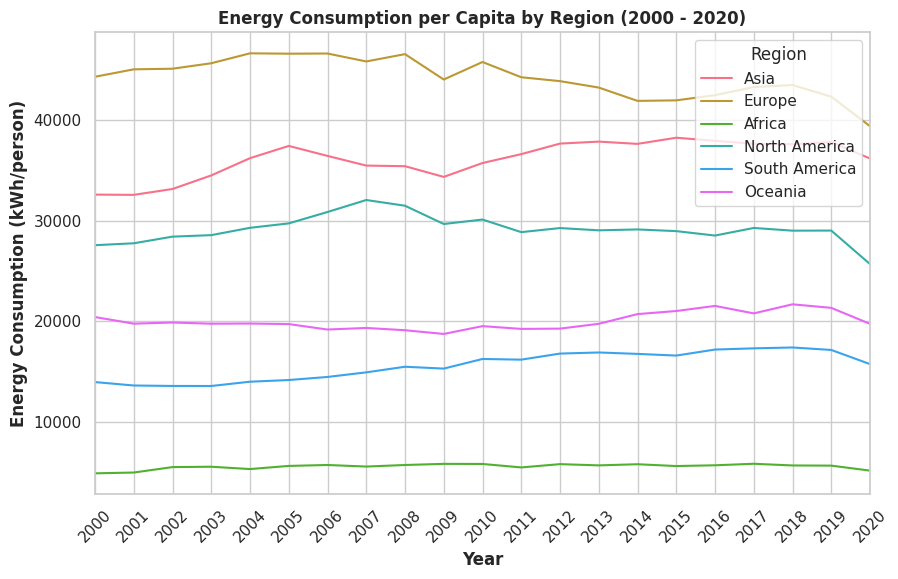

In [ ]:
df_energy_cons_melted = pd.melt(df_energy_all, id_vars='Year', var_name='Region', value_name='Energy Consumption')

# Building a graph
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
palette = sns.color_palette("husl", len(df_energy_cons_melted['Region'].unique()))

plot = sns.lineplot(data=df_energy_cons_melted, x='Year', y='Energy Consumption', hue='Region', palette=palette)

# Adding names to the graph
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Energy Consumption (kWh/person)', fontweight='bold')
plt.title('Energy Consumption per Capita by Region (2000 - 2020)', fontweight='bold')
plt.legend(title='Region')
plt.margins(x=0)

# Adjust the placement of captions on the x-axis and change the date format
years = range(2000, 2021)
plot.set_xticks(years)
plot.set_xticklabels([str(year) for year in years], rotation=45)

plt.show()

The above graph clearly shows the trends in per capita egergy consumption by continent. The graphs are quite different from each other.

Top continents in terms of energy consumption:


1.   Europe
2.   Asia
3.   North America
4.   Oceania
5.   South America
6.   Oceania


The graph shows that energy consumption per capita in Oceania and Africa remained almost unchanged between 2000 and 2020. In addition, it is noticeable that from 2019 to 2020, all graphs begin to fall, so energy consumption per capita has generally decreased for all continents.

It is worth emphasizing that the lowest rates in Africa can be explained by the overall low level of industrialization and rather low living standards of the population in general, respectively, the availability of goods, and energy is such a good, is rather limited. Europe, in turn, has the highest rates, which is quite expected, however, it can be seen that since 2008 the amount of energy consumption per capita has been gradually decreasing, while the countries of Asia have moderately increasing rates, and perhaps soon they will have the highest rates, thereby overtaking the countries of Europe.

In [ ]:
# Creating an empty table df_energy_all with the necessary columns and data types
columns = ['Year', 'Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']
df_energy_all = pd.DataFrame(columns=columns)

# Creating a function to automatically calculate the average value for the continent for the year
def filter_and_calculate_mean(df, year, column_name):
    row_data = {'Year': year}
    for continent in columns[1:]:
        filtered_df = df[(df['Year'] == year) & (df['Continent'] == continent)]
        mean_value = filtered_df[column_name].mean()
        row_data[continent] = mean_value
    return row_data

column_name = 'Renewable energy share in the total final energy consumption (%)'
data_to_concat = []

for year in range(2000, 2020):
    row_data = filter_and_calculate_mean(df, year, column_name)
    data_to_concat.append(row_data)

# Putting it all together
df_energy_all = pd.concat([df_energy_all, pd.DataFrame(data_to_concat)], ignore_index=True)

df_energy_all['Year'] = df_energy_all['Year'].astype('int64')

# Displaying the df_energy_all table for review
display(df_energy_all)

,Year,Asia,Europe,Africa,North America,South America,Oceania
0,2000,24.275897,14.969714,64.004082,21.685185,32.387273,31.955000
1,2001,24.263077,14.703429,63.625918,20.595556,33.653000,29.864167
2,2002,24.017692,14.454857,63.324694,20.811852,34.610000,30.031667
3,2003,23.723590,14.556286,62.714694,20.426296,34.533000,28.897500
4,2004,23.524872,14.958000,62.066327,20.664444,33.339000,28.980833
5,2005,22.735897,15.432857,62.161837,20.530370,33.476000,28.858333
6,2006,22.501538,15.556571,61.932245,19.517037,33.377000,28.242500
7,2007,21.774103,16.638919,61.226327,18.685185,33.658000,26.250000
8,2008,21.632821,17.351081,60.845102,19.003704,33.264000,26.964167
9,2009,21.442051,19.014324,60.347551,18.842593,33.330000,26.258333


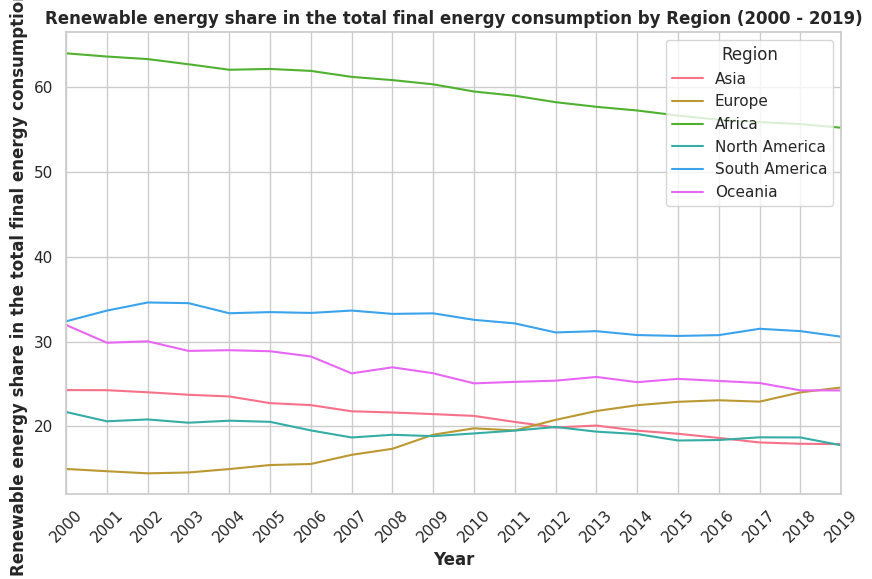

In [ ]:
df_energy_cons_melted = pd.melt(df_energy_all, id_vars='Year', var_name='Region', value_name='Renewable energy share in the total final energy consumption (%)')

# Building a graph
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
palette = sns.color_palette("husl", len(df_energy_cons_melted['Region'].unique()))

plot = sns.lineplot(data=df_energy_cons_melted, x='Year', y='Renewable energy share in the total final energy consumption (%)', hue='Region', palette=palette)

# Adding names to the graph
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Renewable energy share in the total final energy consumption (%)', fontweight='bold')
plt.title('Renewable energy share in the total final energy consumption by Region (2000 - 2019)', fontweight='bold')
plt.legend(title='Region')
plt.margins(x=0)

# Adjust the placement of captions on the x-axis and change the date format
years = range(2000, 2020)
plot.set_xticks(years)
plot.set_xticklabels([str(year) for year in years], rotation=45)

plt.show()

XYZ

**ALGORITHM IMPLEMENTATION**

We have implemented six algorithms for this- KNN, XGBoost, Linear Regression, Random forest Regression, Gradient Boosting Regression and Decision Tree Regression

In [ ]:
#'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Low-carbon electricity (% electricity)','Land Area(Km2)'
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Renewable-electricity-generating-capacity-per-capita',
        'Primary energy consumption per capita (kWh/person)',
        'Access to electricity (% of population)',
        'Electricity from fossil fuels (TWh)',
        'Electricity from nuclear (TWh)',
        'Low-carbon electricity (% electricity)',
        'Value_co2_emissions_kt_by_country',
        'Electricity from renewables (TWh)',
        'Land Area(Km2)',
        'gdp_per_capita']]

# Target variable (dependent variable)
y = df['Renewable energy share in the total final energy consumption (%)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KNN Regression

In [ ]:
# Train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=4)  # You can experiment with different values of k
knn_regressor.fit(X_train, y_train)

# Predict using the trained model
y_pred = knn_regressor.predict(X_test)
# Evaluate the model
mse1 = mean_squared_error(y_test, y_pred)
r2score1 = r2_score(y_test, y_pred)*100
print("Mean Squared Error:", mse1)
print("R2 Score:", r2score1)

Mean Squared Error: 85.85082148972603
R2 Score: 90.32697243201149


In [ ]:
import plotly.express as px

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual Renewable Energy Share', 'y': 'Predicted Renewable Energy Share'},
                 title='Predicted vs Actual Renewable Energy Share')
fig.show()

Extreme Gradient Boosting(XGB)

In [ ]:
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
params = {
    'objective': 'reg:squarederror',  # Specify the regression objective
    'eval_metric': 'rmse'  # Use RMSE (Root Mean Squared Error) as the evaluation metric
}

num_round = 150  # Number of boosting rounds

# Train the model
xg_reg = xgb.train(params, dtrain, num_round)

In [ ]:
# Predict using the trained model
y_pred = xg_reg.predict(dtest)

# Evaluate the model
mse2 = mean_squared_error(y_test, y_pred)
r2score2 = r2_score(y_test, y_pred)*100
print("Mean Squared Error:", mse2)
print("R2 Score:", r2score2)

Mean Squared Error: 12.443605575184712
R2 Score: 98.59794772274437


In [ ]:
import plotly.express as px

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual Renewable Energy Share', 'y': 'Predicted Renewable Energy Share'},
                 title='Predicted vs Actual Renewable Energy Share')
fig.show()

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred)
r2score3 = r2_score(y_test, y_pred)*100
print("Mean Squared Error:", mse3)
print("R2 Score:", r2score3)

Mean Squared Error: 245.45040500286157
R2 Score: 72.34448671582301


In [ ]:
import plotly.express as px

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual Renewable Energy Share', 'y': 'Predicted Renewable Energy Share'},
                 title='Predicted vs Actual Renewable Energy Share')
fig.show()

Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)

# Predict using the trained model
y_pred = gbr.predict(X_test)

# Evaluate the model using Mean Squared Error
mse4 = mean_squared_error(y_test, y_pred)
r2score4 = r2_score(y_test, y_pred)*100
print("Mean Squared Error:", mse4)
print("R2 Score:", r2score4)

Mean Squared Error: 54.92802903672189
R2 Score: 93.81112108296985


In [ ]:
import plotly.express as px

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual Renewable Energy Share', 'y': 'Predicted Renewable Energy Share'},
                 title='Predicted vs Actual Renewable Energy Share')
fig.show()

Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict using the trained model
y_pred = decision_tree.predict(X_test)

# Evaluate the model using Mean Squared Error
mse5 = mean_squared_error(y_test, y_pred)
r2score5 = r2_score(y_test, y_pred)*100
print("Mean Squared Error:", mse5)
print("R2 Score:", r2score5)

Mean Squared Error: 48.84237835616438
R2 Score: 94.49680662191633


In [ ]:
import plotly.express as px

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual Renewable Energy Share', 'y': 'Predicted Renewable Energy Share'},
                 title='Predicted vs Actual Renewable Energy Share')
fig.show()

Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict using the trained model
y_pred = random_forest.predict(X_test)

# Evaluate the model using Mean Squared Error
mse6 = mean_squared_error(y_test, y_pred)
r2score6 = r2_score(y_test, y_pred)*100
print("Mean Squared Error:", mse6)
print("R2 Score:", r2score6)

Mean Squared Error: 14.66796846235617
R2 Score: 98.34732317244352


In [ ]:
import plotly.express as px

fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Actual Renewable Energy Share', 'y': 'Predicted Renewable Energy Share'},
                 title='Predicted vs Actual Renewable Energy Share')
fig.show()

Model Evaluation & Performance Analysis

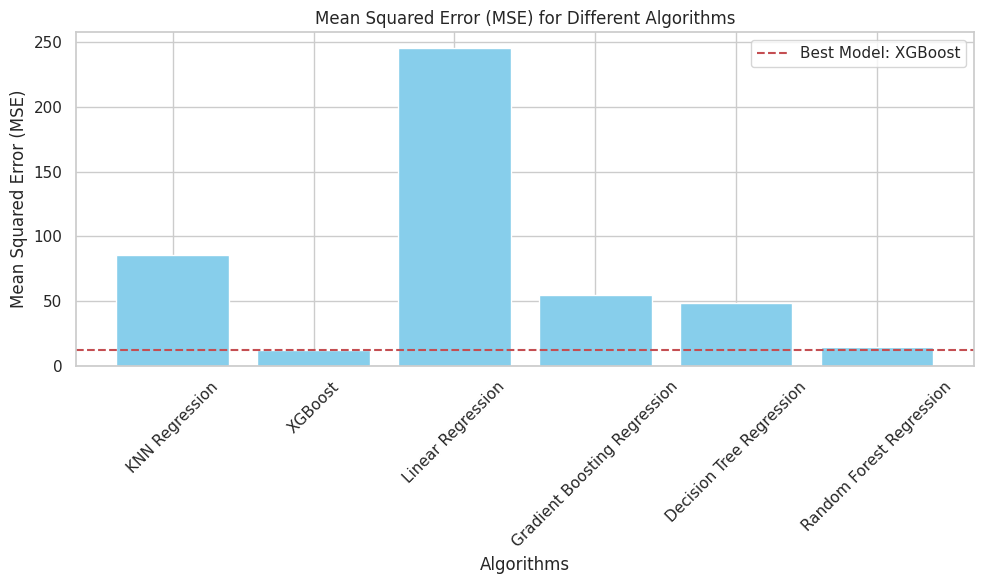

In [ ]:
algorithm_names = ['KNN Regression', 'XGBoost', 'Linear Regression', 'Gradient Boosting Regression', 'Decision Tree Regression', 'Random Forest Regression']
mse_values = [mse1, mse2, mse3, mse4, mse5, mse6]
mse_values_formatted = [f'{mse:.2f}' for mse in mse_values]

# Find the best model (lowest MSE)
best_model = algorithm_names[mse_values.index(min(mse_values))]

# Create a bar plot to compare MSE
plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, mse_values, color='skyblue')
plt.axhline(y=min(mse_values), color='r', linestyle='--', label=f'Best Model: {best_model}')

plt.xlabel('Algorithms')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) for Different Algorithms')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.legend()
plt.show()

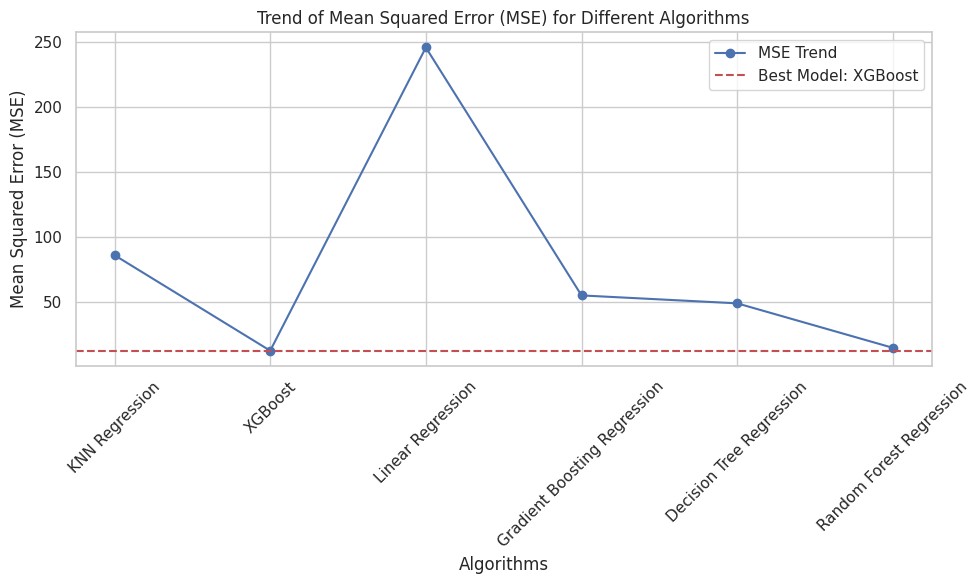

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(algorithm_names, mse_values, marker='o', color='b', label='MSE Trend')
plt.axhline(y=min(mse_values), color='r', linestyle='--', label=f'Best Model: {best_model}')
plt.xlabel('Algorithms')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Trend of Mean Squared Error (MSE) for Different Algorithms')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.legend()
plt.grid(True)
plt.show()

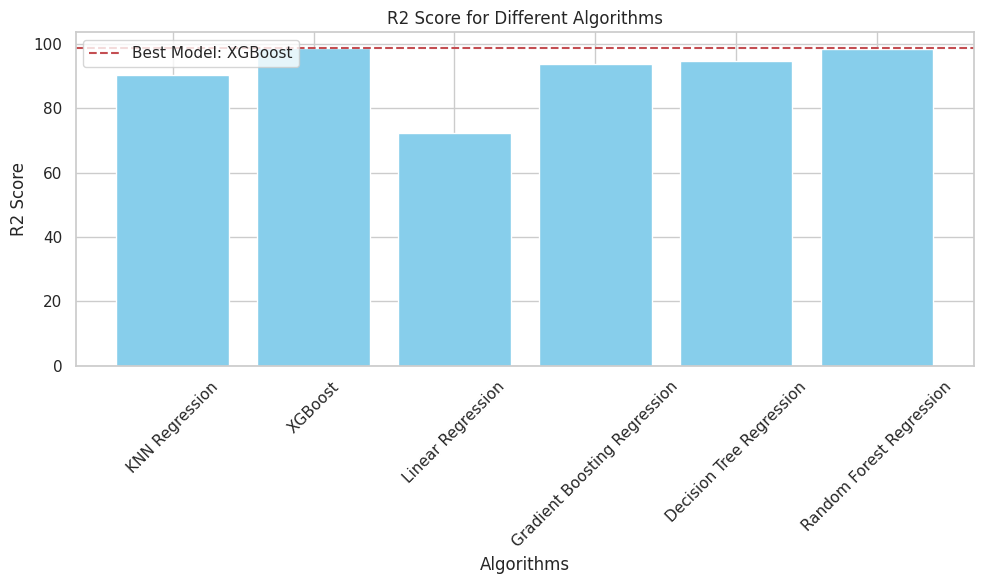

In [ ]:
algorithm_names = ['KNN Regression', 'XGBoost', 'Linear Regression', 'Gradient Boosting Regression', 'Decision Tree Regression', 'Random Forest Regression']
r2score_values = [r2score1,r2score2, r2score3, r2score4, r2score5, r2score6]
r2score_values_formatted = [f'{mse:.2f}' for mse in mse_values]

# Find the best model (lowest MSE)
best_model = algorithm_names[r2score_values.index(max(r2score_values))]

# Create a bar plot to compare MSE
plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, r2score_values, color='skyblue')
plt.axhline(y=max(r2score_values), color='r', linestyle='--', label=f'Best Model: {best_model}')

plt.xlabel('Algorithms')
plt.ylabel('R2 Score')
plt.title('R2 Score for Different Algorithms')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.legend()
plt.show()

As we can clearly see, XGBoost is the best Machine Learning model to use when we want to predict the Renewable energy share in the total final energy consumption in percentage. This will give us an idea how continents in the future are going to utilize Renewable energy resources like Hydropower, Solar energy etc.